# **Installation and Setup**

In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
!pip list

Package                          Version
-------------------------------- -------------------
absl-py                          1.4.0
accelerate                       0.34.2
aiohappyeyeballs                 2.4.0
aiohttp                          3.10.5
aiosignal                        1.3.1
alabaster                        0.7.16
albucore                         0.0.16
albumentations                   1.4.15
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.19.0
astropy                          6.1.3
astropy-iers-data                0.2024.9.16.0.32.21
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            24.2.0
audioread                        3.0.1
autograd                 

In [3]:
import tensorflow as tf
import os

In [4]:
os.path.join('data', 'Happy')

'data/Happy'

In [5]:
# prevents 'out of memory' errors by setting gpu memory
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

# **Remove Dodgy Images**

In [6]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [7]:
image_exts = ['jpeg','jpg','bmp','png']

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
data_dir = '/content/drive/MyDrive/data'

In [10]:
os.listdir(os.path.join(data_dir, 'Happy'))

['image12.jpeg',
 'image22.jpeg',
 'image17.jpeg',
 'sunset-570881_1280.jpg',
 'image15.jpeg',
 'image5.jpeg',
 'genuinely-happy-person.png',
 'Copy-of-Rustic-Female-Teen-Magazine-Cover.jpg',
 '1920px-face-smile.svg_.png',
 'file-20230208-27-3jttof.jpg',
 'image21.jpeg',
 'image13.jpeg',
 'image9.jpeg',
 'image11.jpeg',
 'image2.jpeg',
 'A_Sep20_14_1189155141.jpg',
 'image.jpeg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '-businesspeople-choose-you-for-employment-or-recruitment-illustration-vector.jpg',
 'image18.jpeg',
 'image7.jpeg',
 'images2.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 'image3.jpeg',
 'image23.png',
 'images.jpg',
 'image6.jpeg',
 'py-company-team-colleagues-jumping-flat-winning-characters-collection-vector.jpg',
 'image10.jpeg',
 'image8.jpeg',
 'image14.jpeg',
 'image4.jpeg',
 'image16.jpeg',
 'very-happy-people.jpg',
 'image20.jpeg',
 'Happy_guy.jpg',
 'image19.jpeg',
 'Overtly-Cheerful-Primer-Editorials-mi

In [11]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))
      # os.remove(image_path)

In [12]:
img = cv2.imread(os.path.join(data_dir, 'Happy', '25115.jpg'))

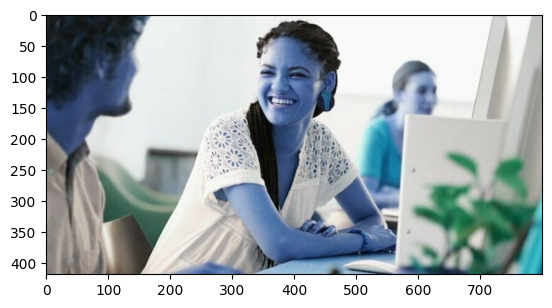

In [13]:
plt.imshow(img)

#**Loading Data**

In [14]:
tf.data.Dataset??

In [15]:
import numpy as np
from matplotlib import pyplot as plt

In [16]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 207 files belonging to 2 classes.


In [17]:
data_iterator = data.as_numpy_iterator()

In [18]:
batch = data_iterator.next()

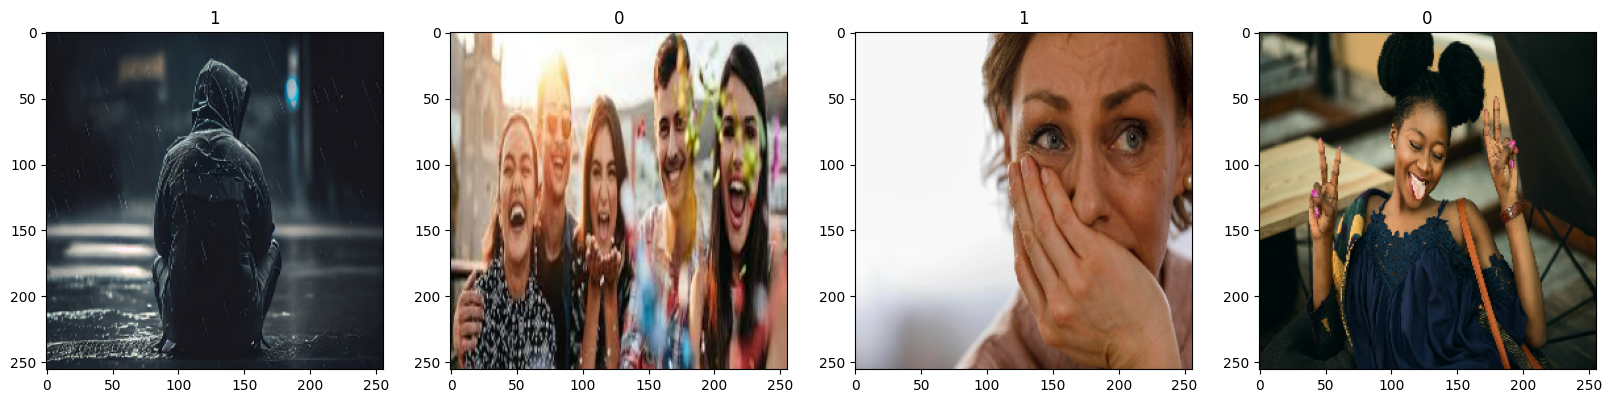

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

# **Scale Data**

In [20]:
data = data.map(lambda x, y: (x/255, y))

In [21]:
data.as_numpy_iterator().next()

(array([[[[3.88235301e-01, 4.15686280e-01, 4.47058827e-01],
          [3.93474251e-01, 4.20925260e-01, 4.52297807e-01],
          [4.04810041e-01, 4.32261020e-01, 4.63633567e-01],
          ...,
          [3.09803933e-01, 3.13725501e-01, 2.94117659e-01],
          [3.01976115e-01, 3.05897683e-01, 2.86289841e-01],
          [2.94117659e-01, 2.98039228e-01, 2.78431386e-01]],
 
         [[3.88857752e-01, 4.16308731e-01, 4.47681278e-01],
          [3.96269917e-01, 4.23720896e-01, 4.55093443e-01],
          [4.04810041e-01, 4.32261020e-01, 4.63633567e-01],
          ...,
          [3.10120612e-01, 3.14042181e-01, 2.94434339e-01],
          [3.04771751e-01, 3.08693320e-01, 2.89085478e-01],
          [2.96913296e-01, 3.00834864e-01, 2.81227022e-01]],
 
         [[3.93198520e-01, 4.20649499e-01, 4.52022046e-01],
          [4.00119901e-01, 4.27570879e-01, 4.58943427e-01],
          [4.08900112e-01, 4.36351091e-01, 4.67723638e-01],
          ...,
          [3.12061548e-01, 3.15983117e-01, 2.9637

# **Split Data**

In [53]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = 1

In [54]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# **Building Deep Learning Model**

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [56]:
model = Sequential()

In [57]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [59]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# **Train**

In [61]:
logdir = 'logs'

In [62]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [63]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.4531 - loss: 1.3151 - val_accuracy: 0.5312 - val_loss: 0.6785
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.5823 - loss: 0.6590 - val_accuracy: 0.4375 - val_loss: 0.6667
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.6073 - loss: 0.6428 - val_accuracy: 0.6875 - val_loss: 0.5174
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.6385 - loss: 0.5838 - val_accuracy: 0.8438 - val_loss: 0.5395
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.8562 - loss: 0.5190 - val_accuracy: 0.8750 - val_loss: 0.4189
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.8010 - loss: 0.4450 - val_accuracy: 0.8125 - val_loss: 0.3878
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.8146 - loss: 0.4157 - val_accuracy: 0.9375 - val_loss: 0.2484
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.8740 - loss: 0.3369 - val_accuracy: 0.9688 - val_loss: 0.2788
Epoch 9/

# **Plot Performance**

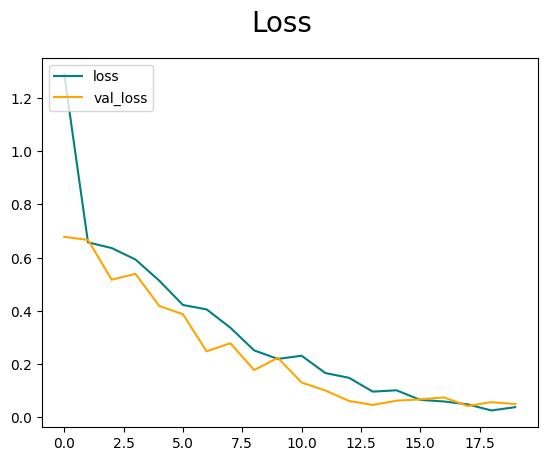

In [64]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

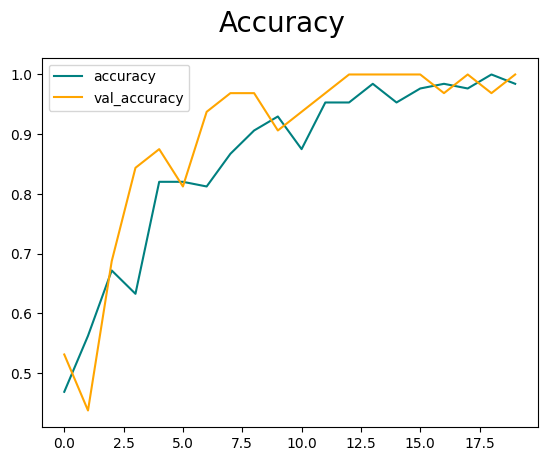

In [65]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# **Evaluate Performance**

In [66]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [67]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [68]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


In [69]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:0.9444444179534912, Accuracy:0.96875


# **Test**

In [71]:
import cv2

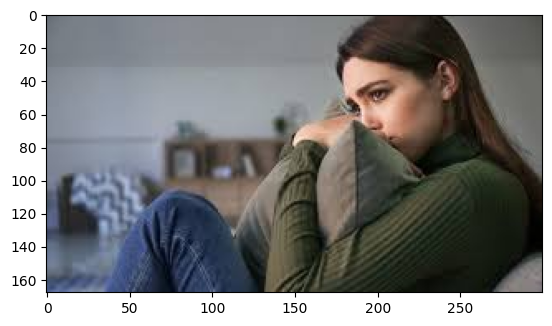

In [86]:
img = cv2.imread(os.path.join(data_dir, 'Sad_test.jpeg'))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

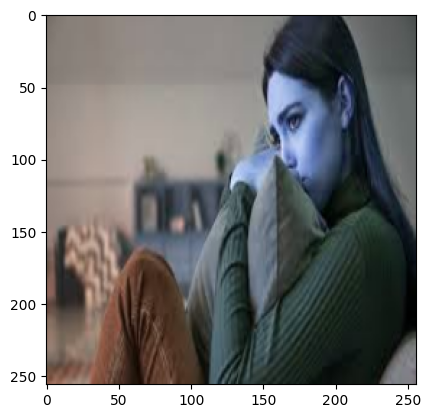

In [87]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [88]:
yhatnew = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [81]:
if yhat > 0.5:
  print(f'Predicted class is Sad')
else:
  print(f'Predicted class is Happy')

Predicted class is Happy


# **Save the Model**

In [82]:
from tensorflow.keras.models import load_model

In [83]:
model.save(os.path.join('models','CNNimageclassifier.h5'))

In [84]:
new_model = load_model(os.path.join('models','CNNimageclassifier.h5'))

In [85]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


array([[0.0177731]], dtype=float32)

In [89]:
if yhatnew > 0.5:
  print(f'Predicted class is Sad')
else:
  print(f'Predicted class is Happy')

Predicted class is Sad
